# QC filtering

## Settings

In [14]:
#Path related settings (these should be the same as for the previous notebook)
output_dir = '/home/rstudio/processed_data'
test = 'Aorta'

## QC Settings

In [ ]:
filter_xy = True  # True or False; filtering out chrX and chrY
binarize_mtx = True  # True or False; convert matrix to binary
select_hvf = False  # True or False; select only highly variable features


## Filtering Settings

In [ ]:
filter_cells = 'True:100:5000'  # True or False:minimum number features a cell should have to pass:max number of features
filter_features = 'True:10:2000'  # True or False:minimum number of cells a feature is found in:max number of cells

## Loading packages and setup

In [20]:
# sctoolbox modules
import sctoolbox.atac_tree as sub_tree
import sctoolbox.creators as cr
from sctoolbox.qc_filter import *
# import episcanpy
import scanpy as sc
import episcanpy as epi

## Setup path handling object 

In [10]:
# make an instance of the class
tree = sub_tree.ATAC_tree()
# set processing/output directory
tree.processing_dir = output_dir
# set sample/experiment.. 
tree.run = test

## Load anndata 

In [11]:
# probably updated in future
assembling_output = tree.assembled_anndata
adata = epi.read_h5ad(assembling_output)
adata

AnnData object with n_obs × n_vars = 373 × 3830
    obs: 'TN', 'UM', 'PP', 'UQ', 'CM', 'file', 'sample', 'mean_fragment_length'
    var: 'name'
    uns: 'color_set', 'infoprocess'

# QC

## 1. filtering out chrX, chrY and chrM

In [ ]:
non_m = [name for name in adata.var_names if not name.startswith('chrM')]  # remove chrM
adata = adata[:, non_m]

In [ ]:
if filter_xy:
    non_xy = [name for name in adata.var_names if not name.startswith('chrY') | name.startswith('chrX')]
    adata = adata[:, non_xy]

In [ ]:
dsiplay(adata)

## 2. removing empty cells and features

In [ ]:
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)
# log-convert number of features
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
display(adata)

## 3. binarize

In [ ]:
adata.raw = adata
if binarize_mtx:
    epi.pp.binarize(adata)
    adata.layers['binary'] = adata.X.copy()

## 4. select highly variable genes

In [ ]:
if hvf:
    select_var_feature(adata, min_score=0.5, nb_features=None, show=False, copy=False)

<Axes:ylabel='value'>

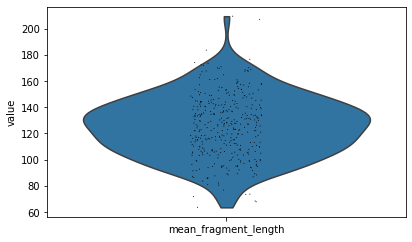

In [26]:
sc.pl.violin(adata, ['mean_fragment_length'], show=False)